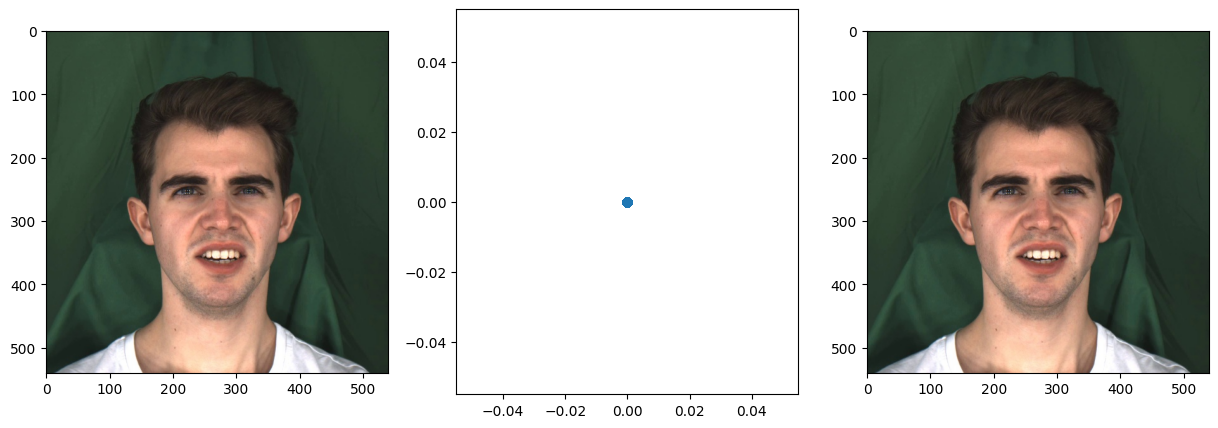

In [190]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/root/Data_Preprocessing/Crop_MEAD/M003/front/angry/level_1/001/000.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# landmarks = np.load('Landmark_MEAD/M003/down/angry/level_1/001/000.npy')
landmarks = np.load('./result/lm_pred.npy').astype(int)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img2 = image.copy()

for k, p in enumerate(landmarks):
    img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)
ax.imshow(img2)
plt.show()

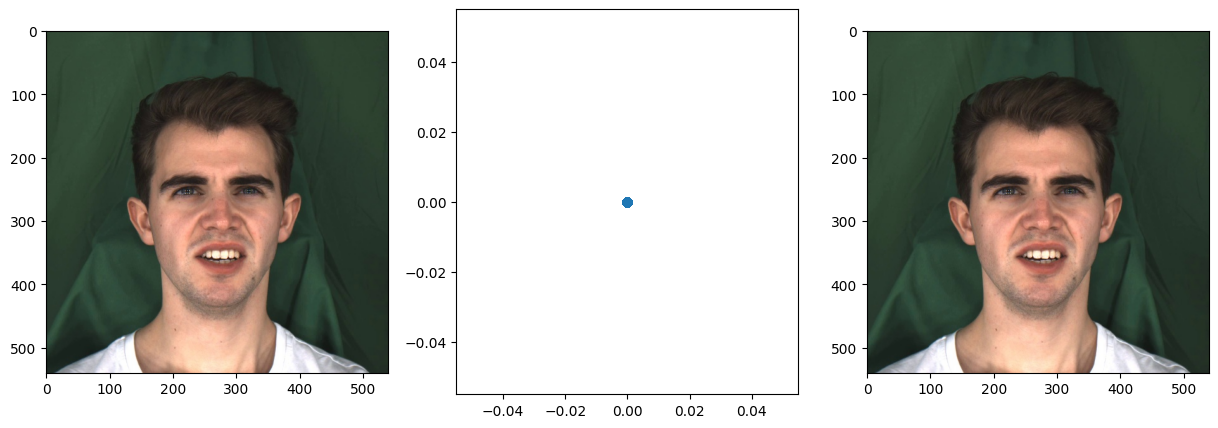

In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/root/Data_Preprocessing/Crop_MEAD/M003/front/angry/level_1/001/000.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# landmarks = np.load('/root/Data_Preprocessing/Landmark_MEAD/M003/front/angry/level_1/001/000.npy')
landmarks = np.load('./result/lm_pred.npy').astype(int)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img2 = image.copy()

for p in landmarks:
    img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)
ax.imshow(img2)
plt.show()

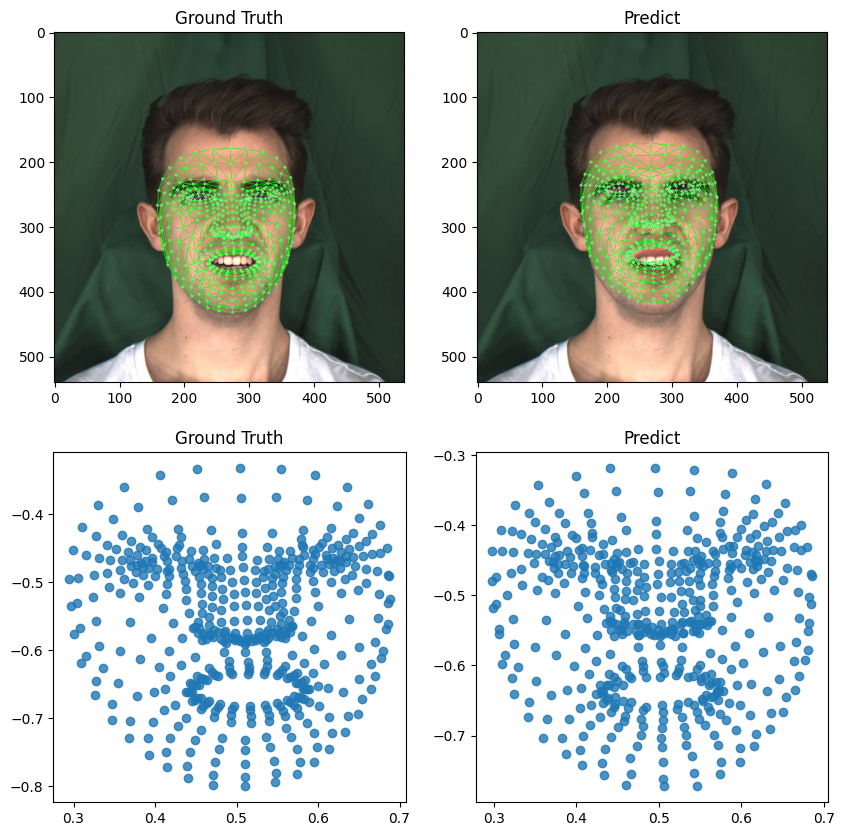

In [213]:
from mediapipe.framework.formats.landmark_pb2 import NormalizedLandmark
from mediapipe.python.solutions.drawing_utils import *
import mediapipe as mp
import matplotlib.pyplot as plt
import cv2
import numpy as np

def draw_mesh(image, pts_mesh):
    lmList = []
    for pts in pts_mesh:
        lm = NormalizedLandmark()
        lm.x, lm.y, lm.z = pts
        lmList.append(lm)

    landmark_subset = NormalizedLandmarkList(
        landmark = lmList
    )

    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_face_mesh = mp.solutions.face_mesh
    mp_landmark_spec = DrawingSpec(color=(0, 255, 0),
                                   thickness = 1,
                                   circle_radius = 1
                                  )
    mp_connection_spec = DrawingSpec(color=(0, 255, 0),
                                     thickness = 1,
                                     circle_radius = 1
                                    )

    #Face Landmark
    face_mesh = mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5)
    image_copy = image.copy()
    mp_drawing.draw_landmarks(
              image=image_copy,
              landmark_list=landmark_subset,
              connections=mp_face_mesh.FACEMESH_TESSELATION,
              landmark_drawing_spec=mp_landmark_spec,
              connection_drawing_spec=mp_connection_spec
    )
    return image_copy

image = cv2.imread('/root/Data_Preprocessing/Crop_MEAD/M003/front/angry/level_1/001/000.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pts_mesh_gt = np.load('/root/Data_Preprocessing/Mesh_light/M003/front/angry/level_1/001/000.npy')

pts_mesh_pred = np.load('./result/lm_pred.npy')

img_gt = draw_mesh(image, pts_mesh_gt)

img_pred = draw_mesh(image, pts_mesh_pred)



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1)
ax.imshow(img_gt)
ax.title.set_text('Ground Truth')
ax = fig.add_subplot(2, 2, 2)
ax.imshow(img_pred)
ax.title.set_text('Predict')

ax = fig.add_subplot(2, 2, 3)
ax.scatter(pts_mesh_gt[:, 0], -pts_mesh_gt[:, 1], alpha=0.8)
ax.title.set_text('Ground Truth')
ax = fig.add_subplot(2, 2, 4)
ax.scatter(pts_mesh_pred[:, 0], -pts_mesh_pred[:, 1], alpha=0.8)
ax.title.set_text('Predict')
plt.show()

In [167]:
part_list = [[range(0, 17)],                                   # face
             [range(17, 22)],                                  # left eyebrow
             [range(22, 27)],                                  # right eyebrow
             [range(27, 31), range(31, 36)],                   # nose
             [[36,37,38,39], [39,40,41,36]],                   # left eye
             [[42,43,44,45], [45,46,47,42]],                   # right eye
             [range(48, 55), [54,55,56,57,58,59,48], range(60, 65), [64,65,66,67,60]]] # mouth and tongue

In [215]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import curve_fit
from mlxtend.image import extract_face_landmarks
from PIL import Image

image = cv2.imread('/root/LiveSpeechPortraits/LiveSpeechPortraits/data/Obama1/candidates/normalized_full_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# keypoints = extract_face_landmarks(image)
# keypoints = np.load('/root/Data_Preprocessing/Landmark_MEAD/M003/front/angry/level_1/001/000.npy')

keypoints = np.load('./result/lm_pred.npy').astype(int)

In [201]:
def func(x, a, b, c):    
    return a * x**2 + b * x + c

def linear(x, a, b):
    return a * x + b

# Given the start and end points, interpolate to get a line.
def interp_points(x, y):    
    if abs(x[:-1] - x[1:]).max() < abs(y[:-1] - y[1:]).max():
        curve_y, curve_x = interp_points(y, x)
        if curve_y is None:
            return None, None
    else:        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")    
            if len(x) < 3:
                popt, _ = curve_fit(linear, x, y)
            else:
                popt, _ = curve_fit(func, x, y)                
                if abs(popt[0]) > 1:
                    return None, None
        if x[0] > x[-1]:
            x = list(reversed(x))
            y = list(reversed(y))
        curve_x = np.linspace(x[0], x[-1], (x[-1]-x[0]))
        if len(x) < 3:
            curve_y = linear(curve_x, *popt)
        else:
            curve_y = func(curve_x, *popt)
    return curve_x.astype(int), curve_y.astype(int)

# Set a pixel to the given color.
def set_color(im, yy, xx, color):
    if len(im.shape) == 3:
        if (im[yy, xx] == 0).all():            
            im[yy, xx, 0], im[yy, xx, 1], im[yy, xx, 2] = color[0], color[1], color[2]            
        else:            
            im[yy, xx, 0] = ((im[yy, xx, 0].astype(float) + color[0]) / 2).astype(np.uint8)
            im[yy, xx, 1] = ((im[yy, xx, 1].astype(float) + color[1]) / 2).astype(np.uint8)
            im[yy, xx, 2] = ((im[yy, xx, 2].astype(float) + color[2]) / 2).astype(np.uint8)
    else:
        im[yy, xx] = color[0]

# Set colors given a list of x and y coordinates for the edge.
def draw_edge(im, x, y, bw=1, color=(255,255,255), draw_end_points=False):
    if x is not None and x.size:
        h, w = im.shape[0], im.shape[1]
        # edge
        for i in range(-bw, bw):
            for j in range(-bw, bw):
                yy = np.maximum(0, np.minimum(h-1, y+i))
                xx = np.maximum(0, np.minimum(w-1, x+j))
                set_color(im, yy, xx, color)

        # edge endpoints
        if draw_end_points:
            for i in range(-bw*2, bw*2):
                for j in range(-bw*2, bw*2):
                    if (i**2) + (j**2) < (4 * bw**2):
                        yy = np.maximum(0, np.minimum(h-1, np.array([y[0], y[-1]])+i))
                        xx = np.maximum(0, np.minimum(w-1, np.array([x[0], x[-1]])+j))
                        set_color(im, yy, xx, color)

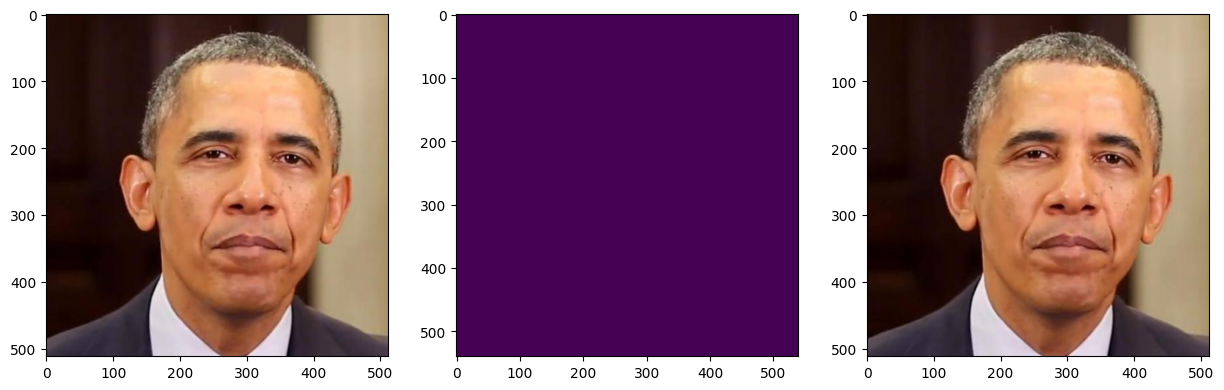

In [216]:
w, h = 540,540
edge_len = 3  # interpolate 3 keypoints to form a curve when drawing edges
# edge map for face region from keypoints
im_edges = np.zeros((h, w), np.uint8) # edge map for all edges
im_edges_full = image.copy()

for edge_list in part_list:
    for edge in edge_list:
#         im_edge = np.zeros((h, w), np.uint8) # edge map for the current edge
        for i in range(0, max(1, len(edge)-1), edge_len-1): # divide a long edge into multiple small edges when drawing
            sub_edge = edge[i:i+edge_len]
            x = keypoints[sub_edge, 0]
            y = keypoints[sub_edge, 1]

            curve_x, curve_y = interp_points(x, y) # interp keypoints to get the curve shape
            draw_edge(im_edges, curve_x, curve_y, bw=1)
            draw_edge(im_edges_full, curve_x, curve_y, bw=2)

img = Image.fromarray(im_edges)
img.save('/root/TalkingHead/landmark2video/LSP_GAN/lm_obama.jpg')

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image)
ax = fig.add_subplot(1, 3, 2)
ax.imshow(im_edges)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(im_edges_full)
plt.show()